# Sentiment Analysis for Tweets

# Outlines.

- **Preprocessing Step I**
    - Lowercasing all the tweets.
    - Romoval of punctuations
    - Removal of Stopwords
    - Lemmatization
    
    
- **Preprocessing Step II**
    - Basic Tf-Idf
    - Word Embedding
    
    
- **Preparing for Models**
    - Splitting Dataset
    
    
- **Models**
    - Naive Bayes
    - LSTM

In [302]:
import pandas as pd
import numpy as np

import seaborn as sns

In [303]:
path = '../input/sentimental-analysis-for-tweets/sentiment_tweets3.csv'

In [304]:
df = pd.read_csv(path)

In [305]:
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [306]:
df['label (depression result)'].value_counts()

0    8000
1    2314
Name: label (depression result), dtype: int64

In [307]:
selected_rows = df[df['label (depression result)'] == 0].head(2314)

In [308]:
selected_rows1= df[df['label (depression result)'] == 1].head(2314)

In [309]:
selected_rows1.head()

,Index,message to examine,label (depression result)
8000,800000,The lack of this understanding is a small but ...,1
8001,800001,i just told my parents about my depression and...,1
8002,800002,depression is something i don't speak about ev...,1
8003,800003,Made myself a tortilla filled with pb&j. My de...,1
8004,800004,@WorldofOutlaws I am gonna need depression med...,1


In [310]:
combined_df = pd.concat([selected_rows1,selected_rows], ignore_index=True)

In [311]:
combined_df.head()

,Index,message to examine,label (depression result)
0,800000,The lack of this understanding is a small but ...,1
1,800001,i just told my parents about my depression and...,1
2,800002,depression is something i don't speak about ev...,1
3,800003,Made myself a tortilla filled with pb&j. My de...,1
4,800004,@WorldofOutlaws I am gonna need depression med...,1


In [312]:
combined_df['label (depression result)'].value_counts()

0    2314
1    2314
Name: label (depression result), dtype: int64

In [313]:
combined_df.tail()

,Index,message to examine,label (depression result)
4623,235935,"my BIS connection is KapuT, no BBM, feels lonely",0
4624,236037,I love how non-chalant &amp; blunt Tony Montan...,0
4625,236412,Glad to have gotten outta bed on my way back ...,0
4626,236419,@FRin323 none of that!! I can't wait!!! so wh...,0
4627,236420,@brendax &lt;333333333 love you!,0


In [314]:
combined_df.loc[3]['message to examine']

'Made myself a tortilla filled with pb&j. My depression is cured. Olivia:1 depression:0'

In [315]:
combined_df.loc[1234]['message to examine']

"@Psychobiotic @ajit9988 It's intriguing...but...I hear people talking about probiotics for depression and I wonder...is this vitamin supplements and herbal remedies for millennials approaching middle age?"

There are 802312 tweets, altogether.

In [316]:
# Checking if there is any null values.

combined_df.isnull().sum()

Index                        0
message to examine           0
label (depression result)    0
dtype: int64

In [317]:
# Check if there's any number

for i in combined_df['message to examine']:
  for j in i.split():
    if j.isdigit():
      s = "yes"
    else:
      s = "no"
print(s)

no


## Remove Numbers

In [318]:
import re

In [319]:
# First Remove all the numbers

def remove_numbers(text):
  return ' '.join([i for i in str(text).split() if not i.isdigit()])

combined_df['clean_tweets'] = combined_df['message to examine'].apply(lambda x: remove_numbers(x))

In [320]:
combined_df

,Index,message to examine,label (depression result),clean_tweets
0,800000,The lack of this understanding is a small but ...,1,The lack of this understanding is a small but ...
1,800001,i just told my parents about my depression and...,1,i just told my parents about my depression and...
2,800002,depression is something i don't speak about ev...,1,depression is something i don't speak about ev...
3,800003,Made myself a tortilla filled with pb&j. My de...,1,Made myself a tortilla filled with pb&j. My de...
4,800004,@WorldofOutlaws I am gonna need depression med...,1,@WorldofOutlaws I am gonna need depression med...
...,...,...,...,...
4623,235935,"my BIS connection is KapuT, no BBM, feels lonely",0,"my BIS connection is KapuT, no BBM, feels lonely"
4624,236037,I love how non-chalant &amp; blunt Tony Montan...,0,I love how non-chalant &amp; blunt Tony Montan...
4625,236412,Glad to have gotten outta bed on my way back ...,0,Glad to have gotten outta bed on my way back h...
4626,236419,@FRin323 none of that!! I can't wait!!! so wh...,0,@FRin323 none of that!! I can't wait!!! so whe...


In [321]:
# Lowercasing all the tweets

combined_df['clean_tweets'] = combined_df['clean_tweets'].str.lower()

## Remove Weblinks

In [322]:
# Removal of Weblinks

def remove_weblinks(text):
  return re.sub(r"http\S+", "", text)

combined_df['clean_tweets2'] = combined_df['clean_tweets'].apply(lambda x: remove_weblinks(x))

In [323]:
combined_df

,Index,message to examine,label (depression result),clean_tweets,clean_tweets2
0,800000,The lack of this understanding is a small but ...,1,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...
1,800001,i just told my parents about my depression and...,1,i just told my parents about my depression and...,i just told my parents about my depression and...
2,800002,depression is something i don't speak about ev...,1,depression is something i don't speak about ev...,depression is something i don't speak about ev...
3,800003,Made myself a tortilla filled with pb&j. My de...,1,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pb&j. my de...
4,800004,@WorldofOutlaws I am gonna need depression med...,1,@worldofoutlaws i am gonna need depression med...,@worldofoutlaws i am gonna need depression med...
...,...,...,...,...,...
4623,235935,"my BIS connection is KapuT, no BBM, feels lonely",0,"my bis connection is kaput, no bbm, feels lonely","my bis connection is kaput, no bbm, feels lonely"
4624,236037,I love how non-chalant &amp; blunt Tony Montan...,0,i love how non-chalant &amp; blunt tony montan...,i love how non-chalant &amp; blunt tony montan...
4625,236412,Glad to have gotten outta bed on my way back ...,0,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...
4626,236419,@FRin323 none of that!! I can't wait!!! so wh...,0,@frin323 none of that!! i can't wait!!! so whe...,@frin323 none of that!! i can't wait!!! so whe...


## Remove Twitter Mentions

In [324]:
def remove_twitter(text):
  return re.sub('@[\w]+','',text)

In [325]:
combined_df['clean_tweets3'] = combined_df['clean_tweets2'].apply(lambda x: remove_twitter(x))

In [326]:
combined_df

,Index,message to examine,label (depression result),clean_tweets,clean_tweets2,clean_tweets3
0,800000,The lack of this understanding is a small but ...,1,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...
1,800001,i just told my parents about my depression and...,1,i just told my parents about my depression and...,i just told my parents about my depression and...,i just told my parents about my depression and...
2,800002,depression is something i don't speak about ev...,1,depression is something i don't speak about ev...,depression is something i don't speak about ev...,depression is something i don't speak about ev...
3,800003,Made myself a tortilla filled with pb&j. My de...,1,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pb&j. my de...
4,800004,@WorldofOutlaws I am gonna need depression med...,1,@worldofoutlaws i am gonna need depression med...,@worldofoutlaws i am gonna need depression med...,"i am gonna need depression meds soon, these r..."
...,...,...,...,...,...,...
4623,235935,"my BIS connection is KapuT, no BBM, feels lonely",0,"my bis connection is kaput, no bbm, feels lonely","my bis connection is kaput, no bbm, feels lonely","my bis connection is kaput, no bbm, feels lonely"
4624,236037,I love how non-chalant &amp; blunt Tony Montan...,0,i love how non-chalant &amp; blunt tony montan...,i love how non-chalant &amp; blunt tony montan...,i love how non-chalant &amp; blunt tony montan...
4625,236412,Glad to have gotten outta bed on my way back ...,0,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...
4626,236419,@FRin323 none of that!! I can't wait!!! so wh...,0,@frin323 none of that!! i can't wait!!! so whe...,@frin323 none of that!! i can't wait!!! so whe...,none of that!! i can't wait!!! so when the bi...


## Removal of Punctuations

In [327]:
import string

In [328]:
PUNCT_TO_REMOVE = string.punctuation

In [329]:
def remove_punctuation(text):
  return text.translate(str.maketrans('','', PUNCT_TO_REMOVE))

In [330]:
combined_df['clean_tweets4'] = combined_df['clean_tweets3'].apply(lambda x: remove_punctuation(x))

In [331]:
combined_df

,Index,message to examine,label (depression result),clean_tweets,clean_tweets2,clean_tweets3,clean_tweets4
0,800000,The lack of this understanding is a small but ...,1,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...
1,800001,i just told my parents about my depression and...,1,i just told my parents about my depression and...,i just told my parents about my depression and...,i just told my parents about my depression and...,i just told my parents about my depression and...
2,800002,depression is something i don't speak about ev...,1,depression is something i don't speak about ev...,depression is something i don't speak about ev...,depression is something i don't speak about ev...,depression is something i dont speak about eve...
3,800003,Made myself a tortilla filled with pb&j. My de...,1,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pbj my depr...
4,800004,@WorldofOutlaws I am gonna need depression med...,1,@worldofoutlaws i am gonna need depression med...,@worldofoutlaws i am gonna need depression med...,"i am gonna need depression meds soon, these r...",i am gonna need depression meds soon these ra...
...,...,...,...,...,...,...,...
4623,235935,"my BIS connection is KapuT, no BBM, feels lonely",0,"my bis connection is kaput, no bbm, feels lonely","my bis connection is kaput, no bbm, feels lonely","my bis connection is kaput, no bbm, feels lonely",my bis connection is kaput no bbm feels lonely
4624,236037,I love how non-chalant &amp; blunt Tony Montan...,0,i love how non-chalant &amp; blunt tony montan...,i love how non-chalant &amp; blunt tony montan...,i love how non-chalant &amp; blunt tony montan...,i love how nonchalant amp blunt tony montana w...
4625,236412,Glad to have gotten outta bed on my way back ...,0,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...
4626,236419,@FRin323 none of that!! I can't wait!!! so wh...,0,@frin323 none of that!! i can't wait!!! so whe...,@frin323 none of that!! i can't wait!!! so whe...,none of that!! i can't wait!!! so when the bi...,none of that i cant wait so when the big day


## Removal of Stopwords

In [332]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [333]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [334]:
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in STOPWORDS])


In [335]:
combined_df['clean_tweets5'] = combined_df['clean_tweets4'].apply(lambda x: remove_stopwords(x))

In [336]:
combined_df

,Index,message to examine,label (depression result),clean_tweets,clean_tweets2,clean_tweets3,clean_tweets4,clean_tweets5
0,800000,The lack of this understanding is a small but ...,1,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,lack understanding small significant part caus...
1,800001,i just told my parents about my depression and...,1,i just told my parents about my depression and...,i just told my parents about my depression and...,i just told my parents about my depression and...,i just told my parents about my depression and...,told parents depression hard get gen x people ...
2,800002,depression is something i don't speak about ev...,1,depression is something i don't speak about ev...,depression is something i don't speak about ev...,depression is something i don't speak about ev...,depression is something i dont speak about eve...,depression something dont speak even going als...
3,800003,Made myself a tortilla filled with pb&j. My de...,1,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pbj my depr...,made tortilla filled pbj depression cured oliv...
4,800004,@WorldofOutlaws I am gonna need depression med...,1,@worldofoutlaws i am gonna need depression med...,@worldofoutlaws i am gonna need depression med...,"i am gonna need depression meds soon, these r...",i am gonna need depression meds soon these ra...,gonna need depression meds soon rainouts spinn...
...,...,...,...,...,...,...,...,...
4623,235935,"my BIS connection is KapuT, no BBM, feels lonely",0,"my bis connection is kaput, no bbm, feels lonely","my bis connection is kaput, no bbm, feels lonely","my bis connection is kaput, no bbm, feels lonely",my bis connection is kaput no bbm feels lonely,bis connection kaput bbm feels lonely
4624,236037,I love how non-chalant &amp; blunt Tony Montan...,0,i love how non-chalant &amp; blunt tony montan...,i love how non-chalant &amp; blunt tony montan...,i love how non-chalant &amp; blunt tony montan...,i love how nonchalant amp blunt tony montana w...,love nonchalant amp blunt tony montana didnt g...
4625,236412,Glad to have gotten outta bed on my way back ...,0,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad gotten outta bed way back home refreshing...
4626,236419,@FRin323 none of that!! I can't wait!!! so wh...,0,@frin323 none of that!! i can't wait!!! so whe...,@frin323 none of that!! i can't wait!!! so whe...,none of that!! i can't wait!!! so when the bi...,none of that i cant wait so when the big day,none cant wait big day


## Frequent Words

In [337]:
from collections import Counter
cnt = Counter()

for text in combined_df['clean_tweets5'].values:
  for word in text.split():
    cnt[word] += 1

cnt.most_common(10)

[('depression', 2285),
 ('im', 485),
 ('â\x80¦', 374),
 ('anxiety', 360),
 ('like', 302),
 ('good', 273),
 ('dont', 241),
 ('day', 230),
 ('know', 215),
 ('get', 212)]

Since, this is a sentiment analysis, **depression** word is important for sentiment analysis, let's keep this as it is.

## Rare words

In [338]:
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])

# Let's see what are the Rarewords

RAREWORDS

{'approval',
 'bbm',
 'bis',
 'casts',
 'designquot',
 'kaput',
 'lt333333333',
 'metsaw',
 'nonchalant',
 'quotmurder'}

In [339]:
# Let's remove these

def remove_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in RAREWORDS])


In [340]:
combined_df['clean_tweets6'] = combined_df['clean_tweets5'].apply(lambda x: remove_stopwords(x))

## Lemmatization


In [341]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [342]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

wordnet_map = {"n": wordnet.NOUN, "v": wordnet.VERB, "j": wordnet.ADJ, "r": wordnet.ADV}

def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.VERB)) for word, pos in pos_tagged_text])

combined_df["text_lemmatized"] = combined_df['clean_tweets6'].apply(lambda text: lemmatize_words(text))


In [343]:
combined_df

,Index,message to examine,label (depression result),clean_tweets,clean_tweets2,clean_tweets3,clean_tweets4,clean_tweets5,clean_tweets6,text_lemmatized
0,800000,The lack of this understanding is a small but ...,1,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,lack understanding small significant part caus...,lack understanding small significant part caus...,lack understand small significant part cause a...
1,800001,i just told my parents about my depression and...,1,i just told my parents about my depression and...,i just told my parents about my depression and...,i just told my parents about my depression and...,i just told my parents about my depression and...,told parents depression hard get gen x people ...,told parents depression hard get gen x people ...,tell parent depression hard get gen x people u...
2,800002,depression is something i don't speak about ev...,1,depression is something i don't speak about ev...,depression is something i don't speak about ev...,depression is something i don't speak about ev...,depression is something i dont speak about eve...,depression something dont speak even going als...,depression something dont speak even going als...,depression something dont speak even go also d...
3,800003,Made myself a tortilla filled with pb&j. My de...,1,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pbj my depr...,made tortilla filled pbj depression cured oliv...,made tortilla filled pbj depression cured oliv...,make tortilla fill pbj depression cure olivia1...
4,800004,@WorldofOutlaws I am gonna need depression med...,1,@worldofoutlaws i am gonna need depression med...,@worldofoutlaws i am gonna need depression med...,"i am gonna need depression meds soon, these r...",i am gonna need depression meds soon these ra...,gonna need depression meds soon rainouts spinn...,gonna need depression meds soon rainouts spinn...,gonna need depression meds soon rainouts spin ...
...,...,...,...,...,...,...,...,...,...,...
4623,235935,"my BIS connection is KapuT, no BBM, feels lonely",0,"my bis connection is kaput, no bbm, feels lonely","my bis connection is kaput, no bbm, feels lonely","my bis connection is kaput, no bbm, feels lonely",my bis connection is kaput no bbm feels lonely,bis connection kaput bbm feels lonely,connection feels lonely,connection feel lonely
4624,236037,I love how non-chalant &amp; blunt Tony Montan...,0,i love how non-chalant &amp; blunt tony montan...,i love how non-chalant &amp; blunt tony montan...,i love how non-chalant &amp; blunt tony montan...,i love how nonchalant amp blunt tony montana w...,love nonchalant amp blunt tony montana didnt g...,love amp blunt tony montana didnt give f nobod...,love amp blunt tony montana didnt give f nobod...
4625,236412,Glad to have gotten outta bed on my way back ...,0,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad gotten outta bed way back home refreshing...,glad gotten outta bed way back home refreshing...,glad get outta bed way back home refresh workout
4626,236419,@FRin323 none of that!! I can't wait!!! so wh...,0,@frin323 none of that!! i can't wait!!! so whe...,@frin323 none of that!! i can't wait!!! so whe...,none of that!! i can't wait!!! so when the bi...,none of that i cant wait so when the big day,none cant wait big day,none cant wait big day,none cant wait big day


## Replace some short words




In [344]:
short_words = {
"aint": "am not",
"arent": "are not",
"cant": "cannot",
"'cause": "because",
"couldve": "could have",
"couldnt": "could not",
"didnt": "did not",
"doesnt": "does not",
"dont": "do not",
"hadnt": "had not",
"hasnt": "has not",
"havent": "have not",
"im": "I am",
"em": "them",
"ive": "I have",
"isnt": "is not",
"lets": "let us",
"theyre": "they are",
"theyve": "they have",
"wasnt": "was not",
"well": "we will",
"were": "we are",
"werent": "were not",
"you're": "you are",
"you've": "you have"
}

In [345]:
def replace_short_words(text):
  for word in text.split():
    if word in short_words:
      text = text.replace(word, short_words[word])
  
  return text

In [346]:
combined_df["clean_tweets7"] = combined_df['text_lemmatized'].apply(lambda text: replace_short_words(text))

In [347]:
combined_df

,Index,message to examine,label (depression result),clean_tweets,clean_tweets2,clean_tweets3,clean_tweets4,clean_tweets5,clean_tweets6,text_lemmatized,clean_tweets7
0,800000,The lack of this understanding is a small but ...,1,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,the lack of this understanding is a small but ...,lack understanding small significant part caus...,lack understanding small significant part caus...,lack understand small significant part cause a...,lack understand small significant part cause a...
1,800001,i just told my parents about my depression and...,1,i just told my parents about my depression and...,i just told my parents about my depression and...,i just told my parents about my depression and...,i just told my parents about my depression and...,told parents depression hard get gen x people ...,told parents depression hard get gen x people ...,tell parent depression hard get gen x people u...,tell parent depression hard get gen x people u...
2,800002,depression is something i don't speak about ev...,1,depression is something i don't speak about ev...,depression is something i don't speak about ev...,depression is something i don't speak about ev...,depression is something i dont speak about eve...,depression something dont speak even going als...,depression something dont speak even going als...,depression something dont speak even go also d...,depression something do not speak even go also...
3,800003,Made myself a tortilla filled with pb&j. My de...,1,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pb&j. my de...,made myself a tortilla filled with pbj my depr...,made tortilla filled pbj depression cured oliv...,made tortilla filled pbj depression cured oliv...,make tortilla fill pbj depression cure olivia1...,make tortilla fill pbj depression cure olivia1...
4,800004,@WorldofOutlaws I am gonna need depression med...,1,@worldofoutlaws i am gonna need depression med...,@worldofoutlaws i am gonna need depression med...,"i am gonna need depression meds soon, these r...",i am gonna need depression meds soon these ra...,gonna need depression meds soon rainouts spinn...,gonna need depression meds soon rainouts spinn...,gonna need depression meds soon rainouts spin ...,gonna need depression meds soon rainouts spin ...
...,...,...,...,...,...,...,...,...,...,...,...
4623,235935,"my BIS connection is KapuT, no BBM, feels lonely",0,"my bis connection is kaput, no bbm, feels lonely","my bis connection is kaput, no bbm, feels lonely","my bis connection is kaput, no bbm, feels lonely",my bis connection is kaput no bbm feels lonely,bis connection kaput bbm feels lonely,connection feels lonely,connection feel lonely,connection feel lonely
4624,236037,I love how non-chalant &amp; blunt Tony Montan...,0,i love how non-chalant &amp; blunt tony montan...,i love how non-chalant &amp; blunt tony montan...,i love how non-chalant &amp; blunt tony montan...,i love how nonchalant amp blunt tony montana w...,love nonchalant amp blunt tony montana didnt g...,love amp blunt tony montana didnt give f nobod...,love amp blunt tony montana didnt give f nobod...,love amp blunt tony montana did not give f nob...
4625,236412,Glad to have gotten outta bed on my way back ...,0,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad to have gotten outta bed on my way back h...,glad gotten outta bed way back home refreshing...,glad gotten outta bed way back home refreshing...,glad get outta bed way back home refresh workout,glad get outta bed way back home refresh workout
4626,236419,@FRin323 none of that!! I can't wait!!! so wh...,0,@frin323 none of that!! i can't wait!!! so whe...,@frin323 none of that!! i can't wait!!! so whe...,none of that!! i can'

In [348]:
xdf = combined_df[['Index','label (depression result)','clean_tweets7']]

In [349]:
xdf

,Index,label (depression result),clean_tweets7
0,800000,1,lack understand small significant part cause a...
1,800001,1,tell parent depression hard get gen x people u...
2,800002,1,depression something do not speak even go also...
3,800003,1,make tortilla fill pbj depression cure olivia1...
4,800004,1,gonna need depression meds soon rainouts spin ...
...,...,...,...
4623,235935,0,connection feel lonely
4624,236037,0,love amp blunt tony montana did not give f nob...
4625,236412,0,glad get outta bed way back home refresh workout
4626,236419,0,none cannot wait big day


In [350]:
xdf.columns = ['Index','Labels','Tweets']

In [351]:
xdf

,Index,Labels,Tweets
0,800000,1,lack understand small significant part cause a...
1,800001,1,tell parent depression hard get gen x people u...
2,800002,1,depression something do not speak even go also...
3,800003,1,make tortilla fill pbj depression cure olivia1...
4,800004,1,gonna need depression meds soon rainouts spin ...
...,...,...,...
4623,235935,0,connection feel lonely
4624,236037,0,love amp blunt tony montana did not give f nob...
4625,236412,0,glad get outta bed way back home refresh workout
4626,236419,0,none cannot wait big day


In [352]:
# Plot the word cloud

from wordcloud import WordCloud

import matplotlib.pyplot as plt

In [353]:
sentences = xdf['Tweets'].tolist()

In [354]:
len(sentences)

4628

In [355]:
# Joining sentences (combining all the sentences that we have)

joined_sentences = " ".join(sentences)

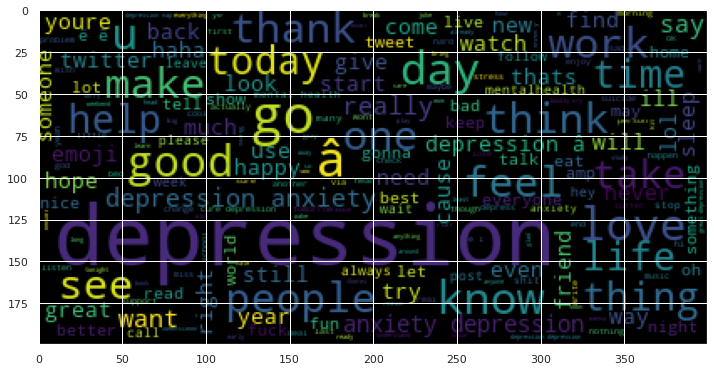

In [356]:
plt.figure(figsize = (12,8))
plt.imshow(WordCloud().generate(joined_sentences));

In [357]:
xdf['Labels'].value_counts()

0    2314
1    2314
Name: Labels, dtype: int64

In [358]:
# Let's visualize postive and negative tweets

In [359]:
positive_tweets = xdf[xdf['Labels'] == 0]
positive_sentences = positive_tweets['Tweets'].tolist()
positive_string = " ".join(positive_sentences)

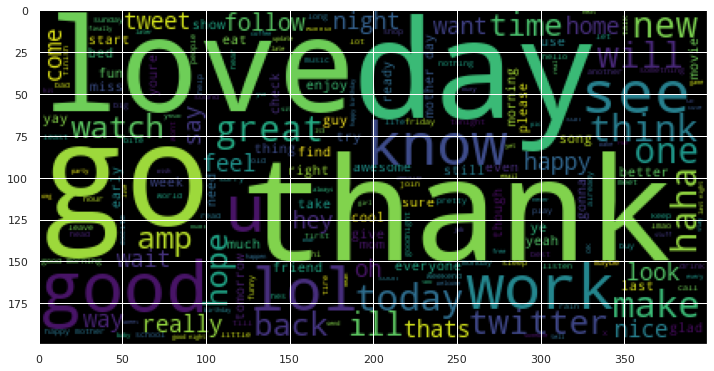

In [360]:
plt.figure(figsize = (12,8))
plt.imshow(WordCloud().generate(positive_string));

In [361]:
# Let's visualize negative tweets

In [362]:
negative_tweets = xdf[xdf['Labels'] == 1]
negative_sentences = negative_tweets['Tweets'].tolist()
negative_string = " ".join(negative_sentences)

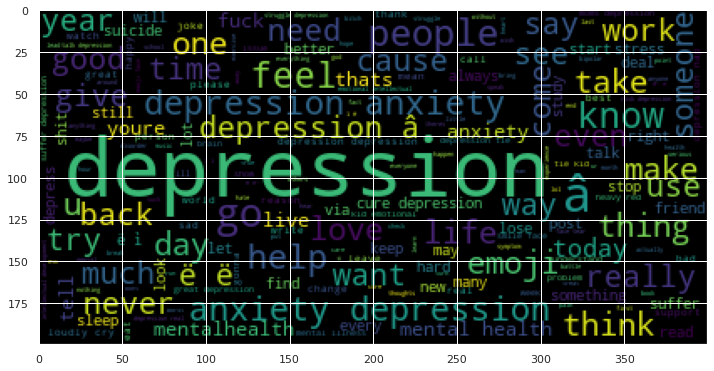

In [363]:
plt.figure(figsize = (12,8))
plt.imshow(WordCloud().generate(negative_string));

# Text Preprocessing : Part II

- tf-idf 


### Basic Sentiment Analaysis

In [364]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [365]:
cv = TfidfVectorizer()

In [366]:
tfidf = cv.fit_transform(xdf['Tweets'])

## Splitting Dataset

In [367]:
from sklearn.model_selection import train_test_split

In [368]:
tfX_train, tfX_test, tfy_train, tfy_test = train_test_split(tfidf, xdf['Labels'], test_size = 0.2)

In [369]:
tfX_train

<3702x9615 sparse matrix of type '<class 'numpy.float64'>'
	with 34904 stored elements in Compressed Sparse Row format>

In [370]:
tfX_train.shape

(3702, 9615)

## Models and Evaluation 

In [371]:
## NaiveBayes

from sklearn.naive_bayes import MultinomialNB

In [372]:
mnb = MultinomialNB()

In [373]:
mnb.fit(tfX_train, tfy_train)

MultinomialNB()

In [374]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred_mnb = mnb.predict(tfX_test)

print(f'Accuracy score is : {accuracy_score(tfy_test, y_pred_mnb)}')

Accuracy score is : 0.9114470842332614


In [375]:
cf = confusion_matrix(tfy_test, y_pred_mnb, labels = [1,0])
cf

array([[436,  23],
       [ 59, 408]])

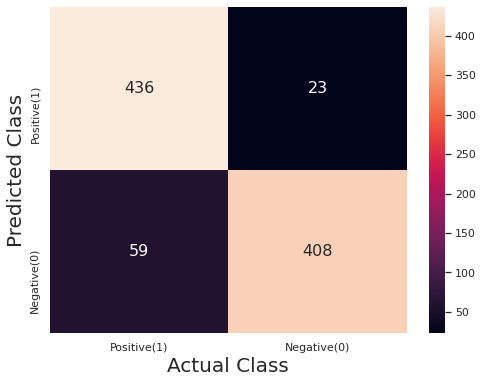

In [376]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

plt.figure(figsize = (8,6))
sns.set(font_scale=1)
sns.heatmap(cf, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

### Better Sentiment Analaysis

We will improve our model with **LSTIM** and **Pre-trained Word Embeddings**

The use of pre-trained word embeddings. 

In [377]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub


In [378]:
# Load Pretrained Word2Vec

embed = hub.load("https://tfhub.dev/google/Wiki-words-250/2")

In [379]:
def get_max_length(df):
  ## get max token counts from train data,
  ## so we use this number as fixed length input to RNN cell

  max_length = 0
  for row in xdf['Tweets']:
    if len(row.split(" ")) > max_length:
      max_length = len(row.split(" "))
  
  return max_length

In [380]:
get_max_length(xdf['Tweets'])

51

In [381]:
def get_word2vec_enc(tweets):
  ## get word2vec value for each word in sentence
  # concatenate word in numpy array, so we can use it as RNN input

  encoded_tweets = []
  for tweet in tweets:
    tokens = tweet.split(" ")
    word2vec_embedding = embed(tokens)
    encoded_tweets.append(word2vec_embedding)
  return encoded_tweets


In [382]:
def get_padded_encoded_tweets(encoded_tweets):
  # for short sentences, we prepend zero padding so all input to RNN
  # has same length

  padded_tweets_encoding = []
  for enc_tweet in encoded_tweets:
    zero_padding_cnt = max_length - enc_tweet.shape[0]
    pad = np.zeros((1, 250))
    for i in range(zero_padding_cnt):
      enc_tweet = np.concatenate((pad, enc_tweet), axis = 0)
    padded_tweets_encoding.append(enc_tweet)
  return padded_tweets_encoding

In [383]:
def sentiment_encode(sentiment):
    if sentiment == 0:
        return [0,1]
    else:
        return [1,0]

In [384]:
def preprocess(df):
  # encode text value to numeric value

  tweets = df['Tweets'].tolist()

  encoded_tweets = get_word2vec_enc(tweets)
  padded_encoded_tweets = get_padded_encoded_tweets(encoded_tweets)

  #encoded sentiment
  sentiments = df['Labels'].tolist()
  encoded_sentiment = [sentiment_encode(sentiment) for sentiment in sentiments]

  X = np.array(padded_encoded_tweets)
  Y = np.array(encoded_sentiment)

  return X, Y

In [385]:
# Preprocess 

max_length = get_max_length(xdf)
max_length

51

In [386]:
tdf = xdf.sample(frac = 1)
train = tdf[:4000]
test = tdf[4000:]

In [387]:
train.shape, test.shape

((4000, 3), (628, 3))

In [388]:
train_X, train_Y = preprocess(train)
test_X, test_Y = preprocess(test)

In [389]:
## Build Model

In [390]:
# LSTM

model = Sequential()
model.add(LSTM(32))
model.add(Dense(2, activation = 'softmax'))

In [391]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

## Train

In [392]:

model.fit(train_X, train_Y, epochs = 10)

Epoch 1/10
125/125 [==============================] - 4s 21ms/step - loss: 0.4654 - accuracy: 0.8072
Epoch 2/10
125/125 [==============================] - 3s 21ms/step - loss: 0.1042 - accuracy: 0.9710
Epoch 3/10
125/125 [==============================] - 3s 21ms/step - loss: 0.0711 - accuracy: 0.9795
Epoch 4/10
125/125 [==============================] - 3s 21ms/step - loss: 0.0606 - accuracy: 0.9832
Epoch 5/10
125/125 [==============================] - 3s 21ms/step - loss: 0.0558 - accuracy: 0.9845
Epoch 6/10
125/125 [==============================] - 3s 21ms/step - loss: 0.0558 - accuracy: 0.9843
Epoch 7/10
125/125 [==============================] - 3s 24ms/step - loss: 0.0501 - accuracy: 0.9845
Epoch 8/10
125/125 [==============================] - 3s 21ms/step - loss: 0.0450 - accuracy: 0.9890
Epoch 9/10
125/125 [==============================] - 3s 21ms/step - loss: 0.0467 - accuracy: 0.9870
Epoch 10/10
125/125 [==============================] - 3s 21ms/step - loss: 0.0592 - accura

In [393]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (32, 32)                  36224     
_________________________________________________________________
dense_3 (Dense)              (32, 2)                   66        
Total params: 36,290
Trainable params: 36,290
Non-trainable params: 0
_________________________________________________________________


## Test

In [394]:
score, acc = model.evaluate(test_X, test_Y, verbose = 2)
print("Test Score:", score)
print("Test Accuracy:", acc)

20/20 - 1s - loss: 0.0530 - accuracy: 0.9857
Test Score: 0.05303824320435524
Test Accuracy: 0.9856687784194946


In [395]:
# Confusion Matrix

y_pred = model.predict(test_X)

In [396]:
import sklearn.metrics as metrics

In [397]:
matrix = metrics.confusion_matrix(test_Y.argmax(axis = 1), y_pred.argmax(axis = 1), labels = [1,0])

In [398]:
matrix

array([[292,   2],
       [  7, 327]])

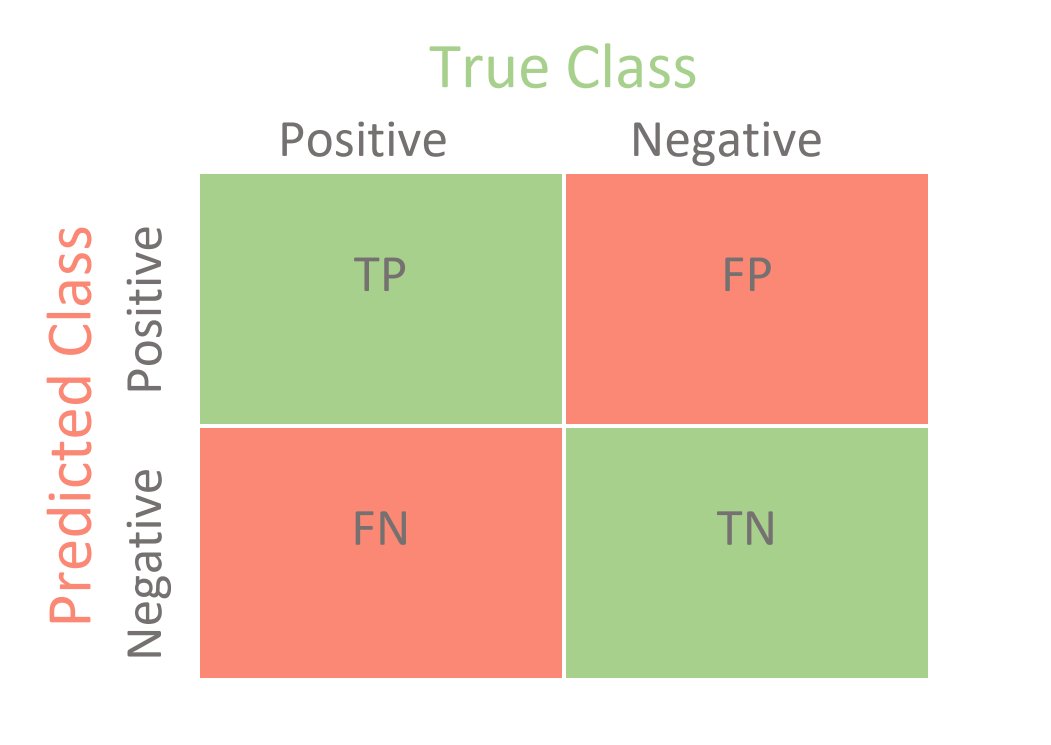

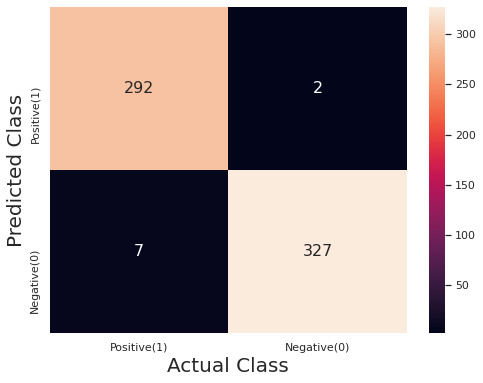

In [399]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

plt.figure(figsize = (8,6))
sns.set(font_scale=1)
sns.heatmap(matrix, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()